In [36]:
#Importing neccessary packages and libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Extracting data from csv file
csv_loc = "/content/drive/MyDrive/diabetes.csv"
df = pd.read_csv(csv_loc)
#Setting index
df.index = df.index + 1
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [77]:
# Display the first five rows of dataframe
(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [78]:
# Display the last five rows of dataframe
(df.tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1
768,1,93,70,31,0,30.4,0.315,23,0


In [79]:
# summary statistics of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


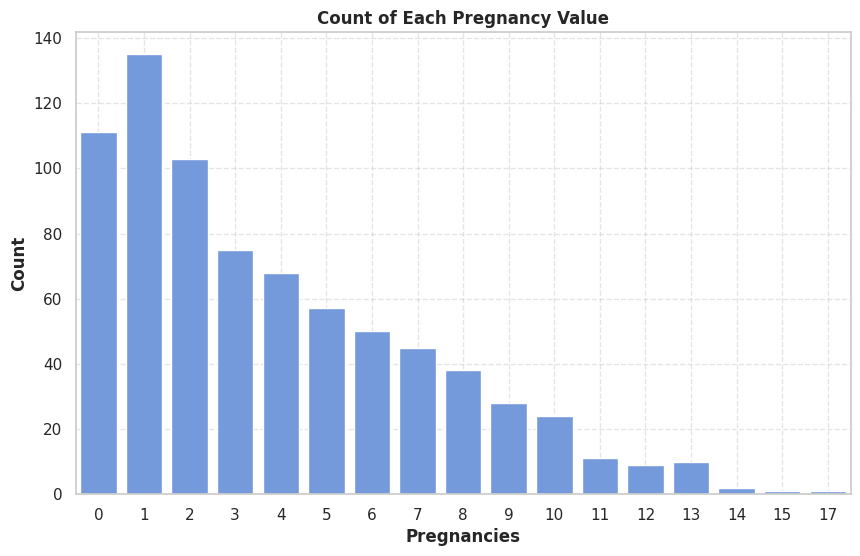

In [94]:
# Set style
sns.set(style="whitegrid")

# Plot barplot of value counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pregnancies', color='cornflowerblue')

# Labels and title
plt.title('Count of Each Pregnancy Value', fontweight='bold')
plt.xlabel('Pregnancies', fontweight='semibold')
plt.ylabel('Count', fontweight='semibold')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

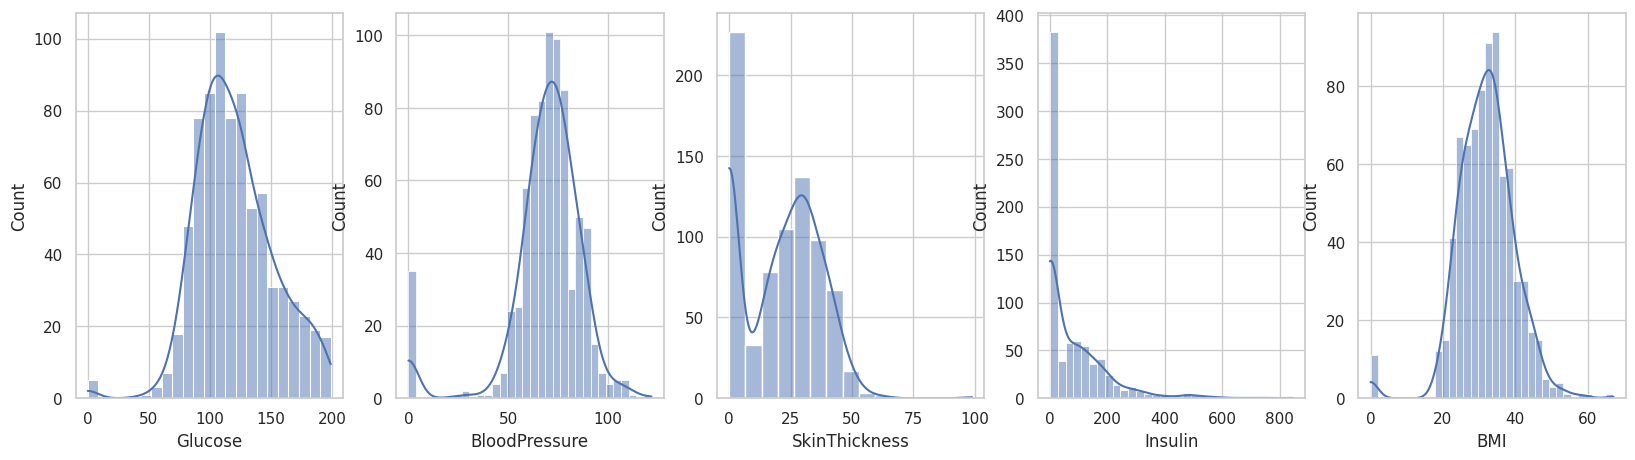

In [96]:
# See data distribution for glucose, blood_pressure, skin_thickness, insulin, and bmi
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
fig = plt.figure(figsize=(20, 5))
for i in range(len(cols)):
    plt.subplot(1, 5, i+1)
    sns.histplot(df[cols[i]], kde=True)

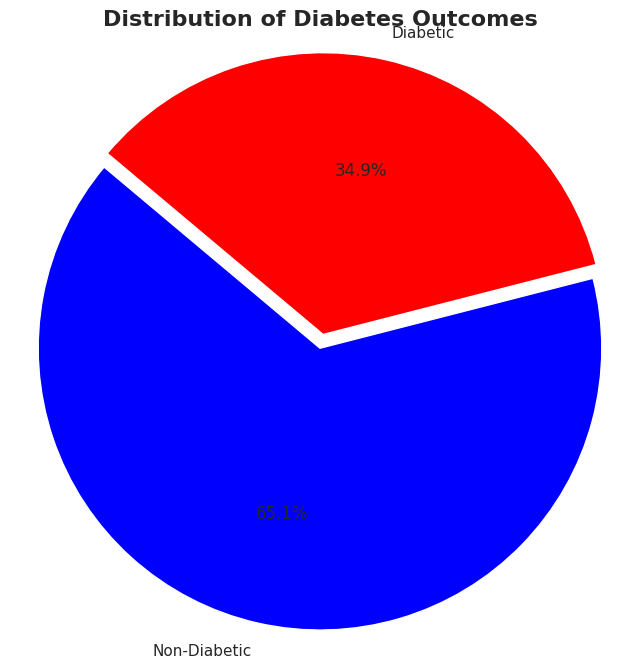

In [98]:
# Count values for the Outcome column
outcome_counts = df['Outcome'].value_counts()

# Labels and values
labels = ['Non-Diabetic', 'Diabetic']
sizes = outcome_counts.values
colors = ['blue', 'red']  # Non-Diabetic = green, Diabetic = orange

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=(0, 0.05))  # Pop out diabetic slice slightly

plt.title('Distribution of Diabetes Outcomes', fontsize=16, fontweight='bold')
plt.axis('equal')  # Keeps the pie circular
plt.show()

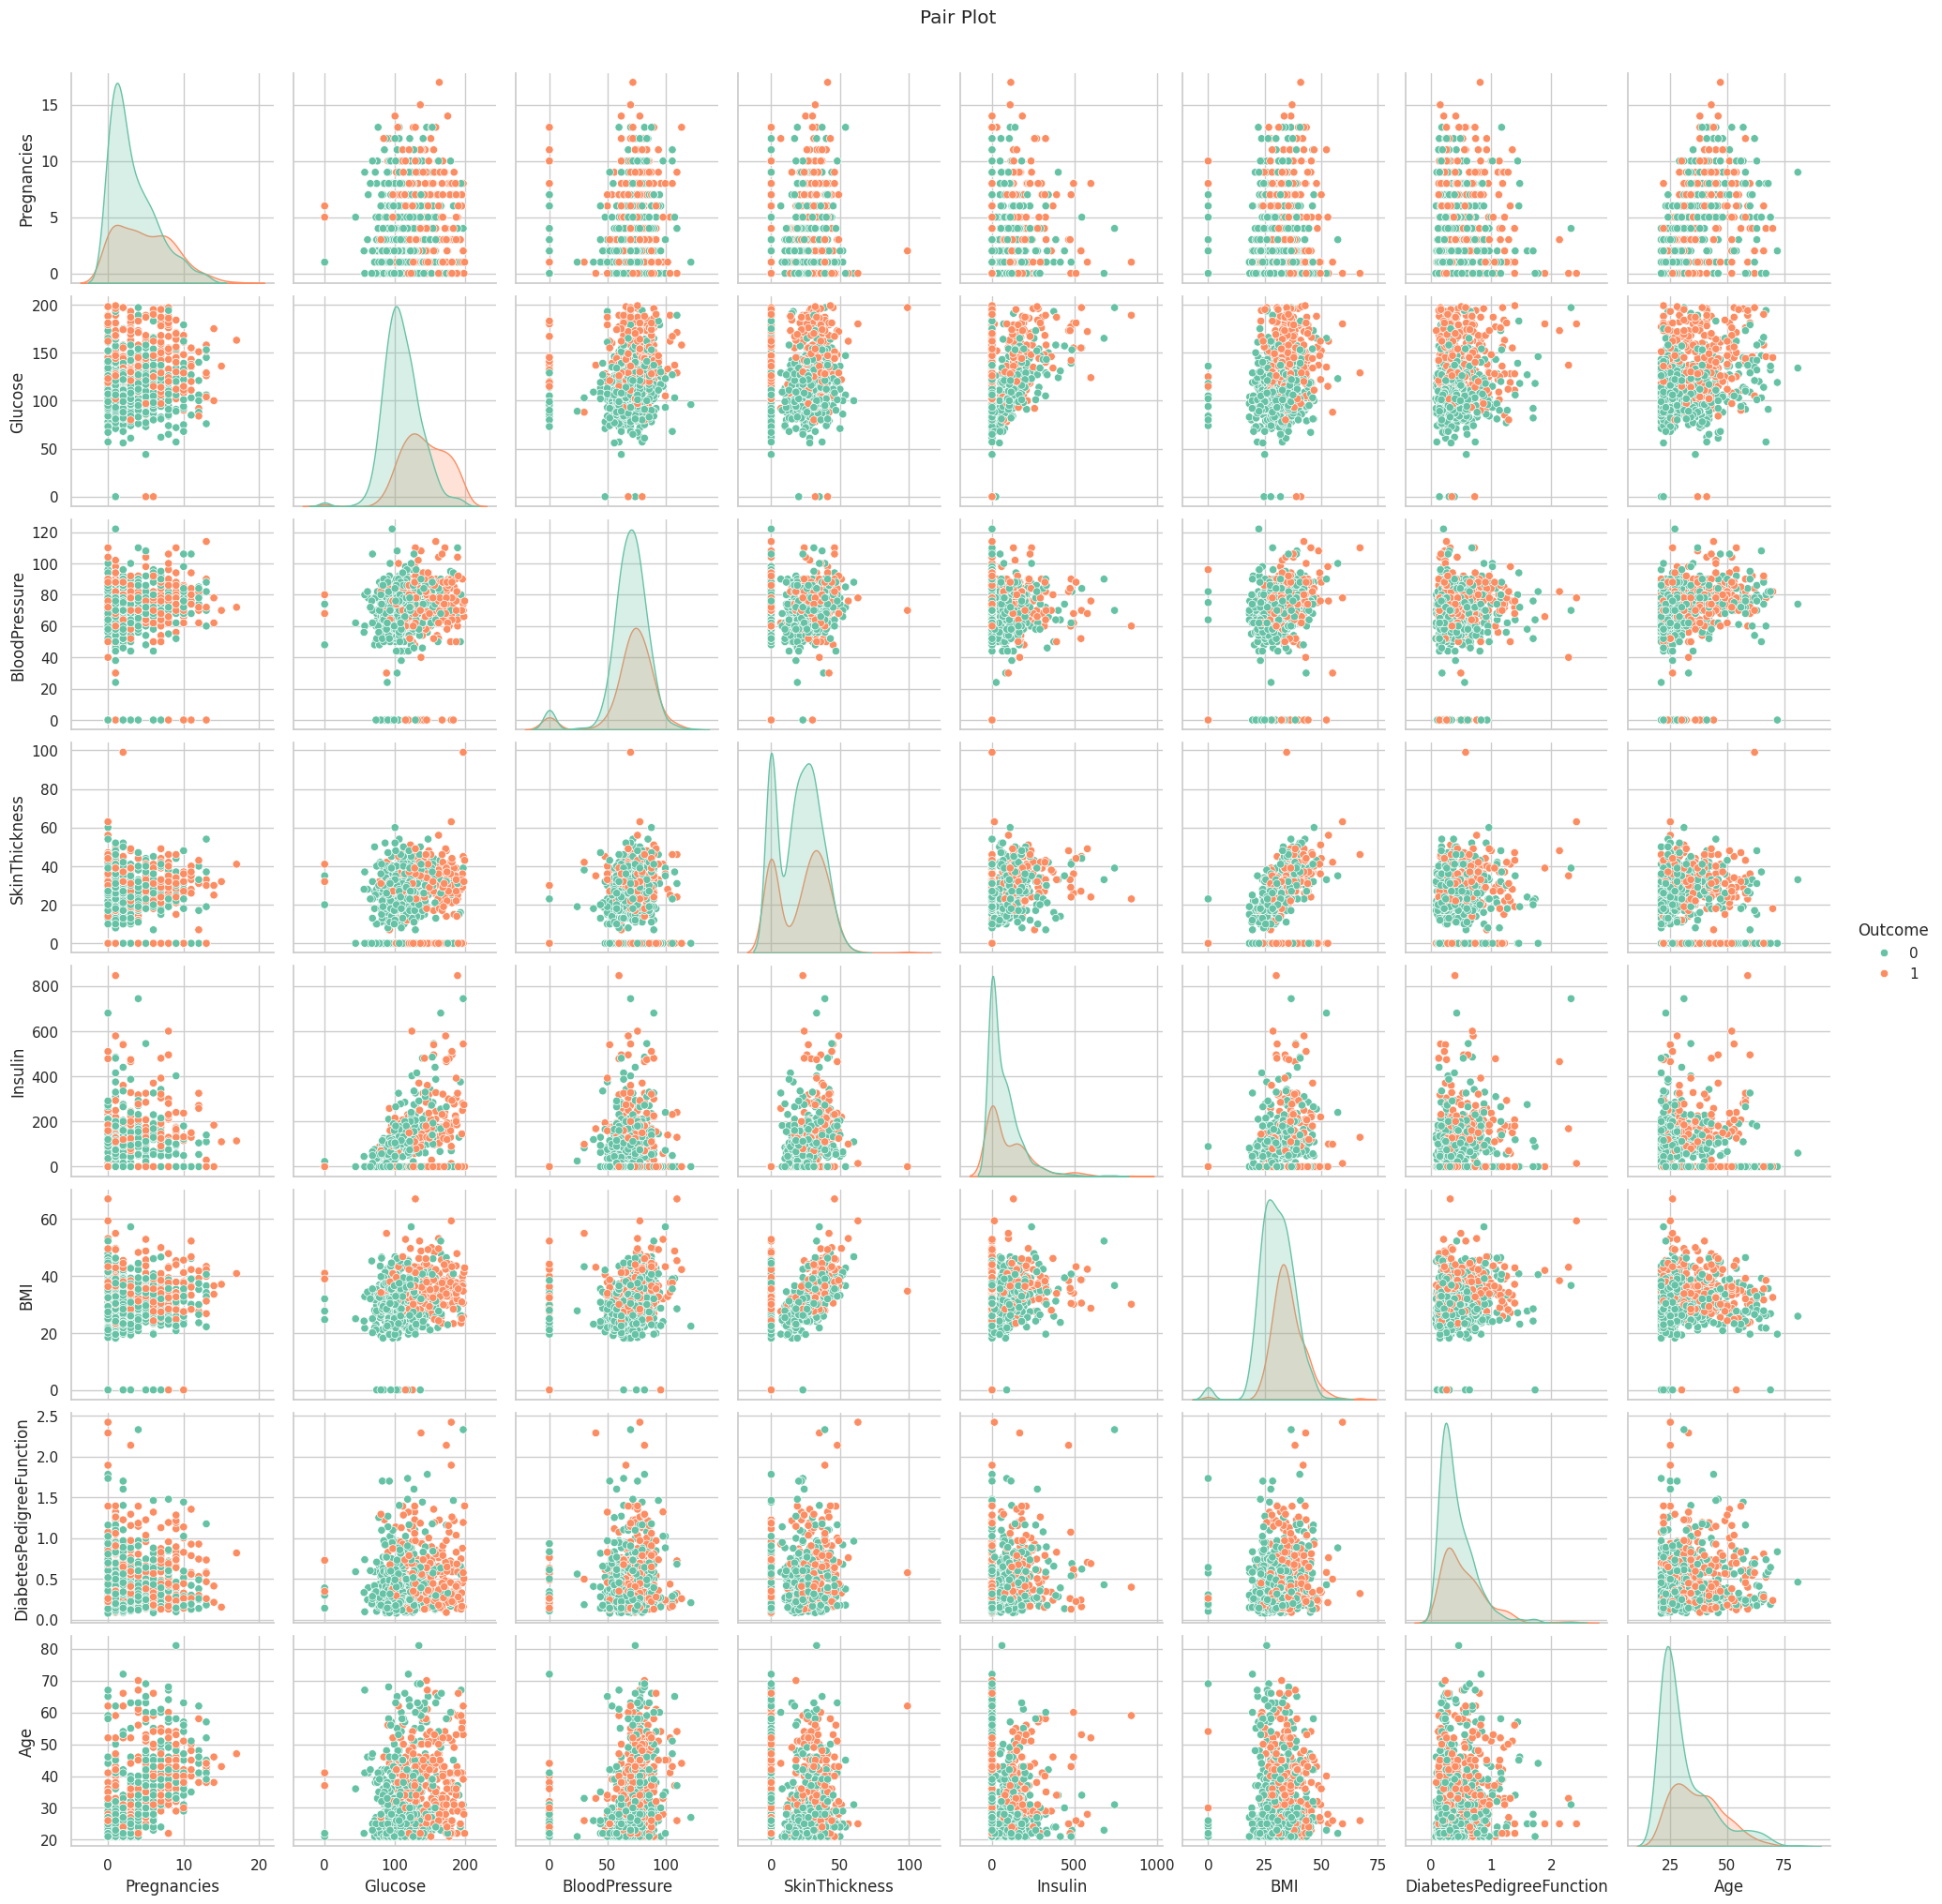

In [101]:
# Pair plot
sns.pairplot(df, hue='Outcome', palette='Set2')
plt.suptitle("Pair Plot ", y=1.02)
plt.show()

In [80]:
# To find the correlation of each column in a DataFrame.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


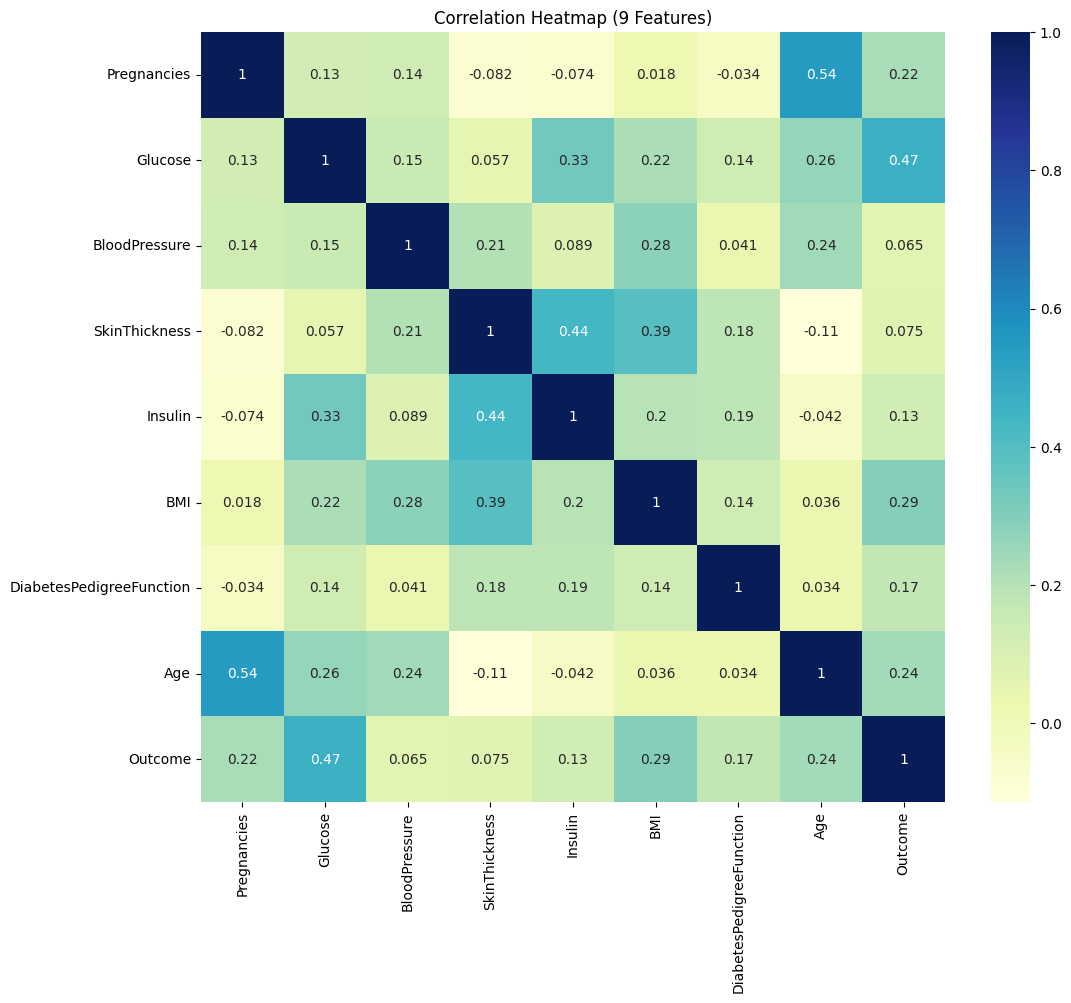

<Figure size 640x480 with 0 Axes>

In [82]:
# Compute correlation matrix for 9 features
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', cbar=True)
plt.title("Correlation Heatmap (9 Features)")
plt.show()
plt.savefig("heatmap.png")

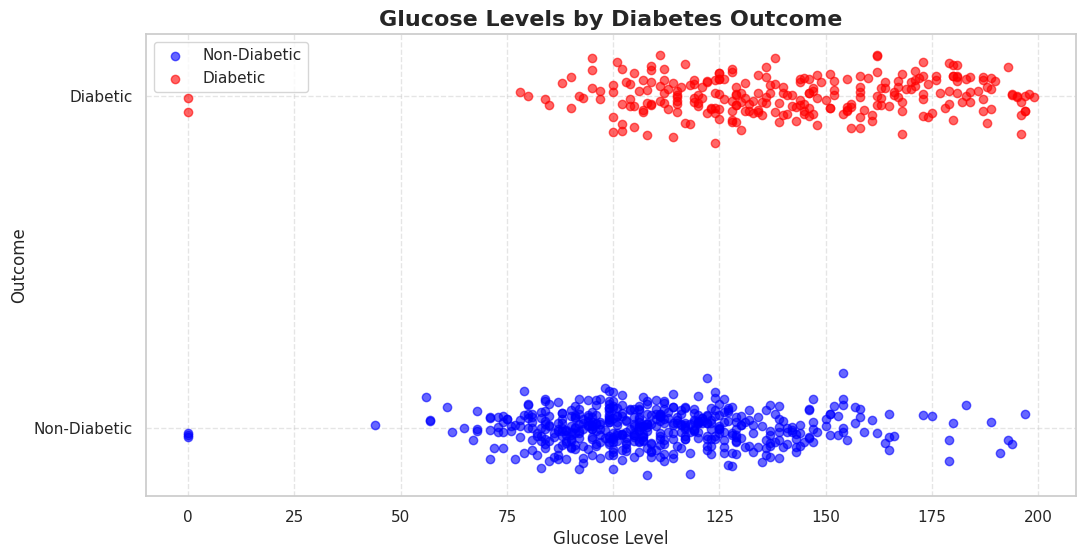

In [106]:
plt.figure(figsize=(12, 6))
y_non_diabetic = np.random.normal(0, 0.05, size=(df[df['Outcome'] == 0].shape[0]))
y_diabetic = np.random.normal(1, 0.05, size=(df[df['Outcome'] == 1].shape[0]))
# Plot non-diabetic patients
plt.scatter(df[df['Outcome'] == 0]['Glucose'],
            y_non_diabetic,
            color='blue',
            label='Non-Diabetic',
            alpha=0.6)

# Plot diabetic patients
plt.scatter(df[df['Outcome'] == 1]['Glucose'],
            y_diabetic,
            color='red',
            label='Diabetic',
            alpha=0.6)

# Set labels and title
plt.title('Glucose Levels by Diabetes Outcome', fontsize=16, fontweight='bold')
plt.xlabel('Glucose Level', fontsize=12)
plt.yticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.ylabel('Outcome', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [83]:
# Checking how many zero values

print("number of rows zero in Pregnancies: {0}".format(len(df.loc[df['Pregnancies'] == 0])))
print("number of rows zero in Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows zero in BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows zero in SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("number of rows zero in Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows zero in BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows zero in DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows zero in Age: {0}".format(len(df.loc[df['Age'] == 0])))

number of rows zero in Pregnancies: 111
number of rows zero in Glucose: 5
number of rows zero in BloodPressure: 35
number of rows zero in SkinThickness: 227
number of rows zero in Insulin: 374
number of rows zero in BMI: 11
number of rows zero in DiabetesPedigreeFunction: 0
number of rows zero in Age: 0


In [8]:

X = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

In [9]:
print(X.shape, y.shape)

(768, 7) (768,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 7) (154, 7) (614,) (154,)


In [17]:
# simple linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

0.3308377960965726


In [25]:

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# using a k-nearest neighbors model to classify the data

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

(614, 7) (154, 7) (614,) (154,)
0.7402597402597403


In [26]:

from sklearn.model_selection import GridSearchCV

n_neighbors = [5, 10, 15, 20, 25, 30]

model = KNeighborsClassifier()

parameters = {'n_neighbors': n_neighbors}

clf = GridSearchCV(model, parameters, cv=5)

clf.fit(X, y)

print(clf.best_params_)

{'n_neighbors': 20}


In [27]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

0.06645729461917294


In [28]:
try:
    import sklearn
except (ModuleNotFoundError, ImportError) as e:
    %pip install scikit-learn

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = sklearn.linear_model.LogisticRegression()

classifier.fit(X_train, y_train)
# the default score for logisitic regression is the accuracy:
classifier.score(X_test, y_test)
print(f"Score: {classifier.score(X_test, y_test)}")

# or we can explicitly calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, classifier.predict(X_test))
print(f"Accuracuy score: {accuracy_score(y_test, classifier.predict(X_test))}")

Score: 0.7662337662337663
Accuracuy score: 0.7662337662337663


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ds = scaler.fit_transform(X)

# now we can split the data
X_train, X_test, y_train, y_test = train_test_split(ds, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# now we can train the model

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

(614, 7) (154, 7) (614,) (154,)


In [32]:
from sklearn.model_selection import cross_val_score

print(model.score(X_test, y_test))

# now use the elbow methods to find the optimal number of neighbors

accuracy_rate = []
error_rate = []
# Put your solution here:
for n_neighbors in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    score = cross_val_score(model, X, y, cv=10)
    accuracy_rate.append(score.mean())
    error_rate.append(1 - score.mean())
    print(f"n_neighbors: {n_neighbors}, score: {model.score(X_test, y_test)}")



0.7142857142857143
n_neighbors: 1, score: 0.6558441558441559
n_neighbors: 2, score: 0.6688311688311688
n_neighbors: 3, score: 0.6948051948051948
n_neighbors: 4, score: 0.6883116883116883
n_neighbors: 5, score: 0.7142857142857143
n_neighbors: 6, score: 0.7012987012987013
n_neighbors: 7, score: 0.7272727272727273
n_neighbors: 8, score: 0.7402597402597403
n_neighbors: 9, score: 0.7467532467532467
n_neighbors: 10, score: 0.7597402597402597
n_neighbors: 11, score: 0.7467532467532467
n_neighbors: 12, score: 0.7467532467532467
n_neighbors: 13, score: 0.7467532467532467
n_neighbors: 14, score: 0.7727272727272727
n_neighbors: 15, score: 0.7337662337662337
n_neighbors: 16, score: 0.7207792207792207
n_neighbors: 17, score: 0.7207792207792207
n_neighbors: 18, score: 0.7402597402597403
n_neighbors: 19, score: 0.7597402597402597


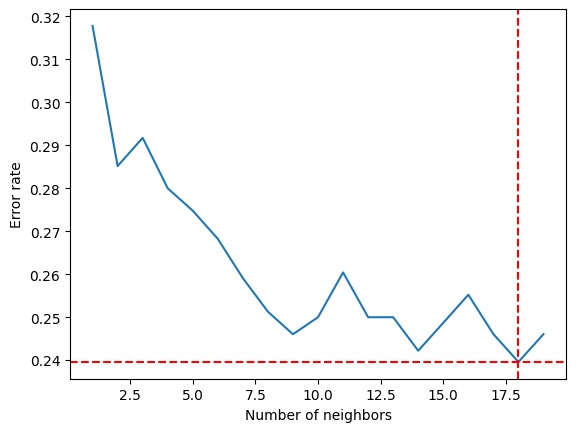

In [33]:
import matplotlib.pyplot as plt

plt.plot(range(1, 20), error_rate)
plt.xlabel('Number of neighbors')
plt.ylabel('Error rate')
# plot horizontal line at minimum error rate
plt.axhline(y=min(error_rate), color='r', linestyle='--')
# and a vertical line at the minimum error rate
plt.axvline(x=error_rate.index(min(error_rate))+1, color='r', linestyle='--')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ds = scaler.fit_transform(X)

# Now we want to create a classifier and find the best hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()

parameters = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}


grid = GridSearchCV(model, parameters)

grid.fit(ds, y)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best parameters: {'C': 1, 'gamma': 0.1}
Best score: 0.7760971055088701


In [35]:
# Now we want to test multiple classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = [SVC(), RandomForestClassifier(), GaussianNB(), LogisticRegression(), DecisionTreeClassifier()]

parameters = {'SVM': {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10], 'gamma': [0.01, 0.1]},
              'Random Forest': {'n_estimators': [10, 100], 'max_depth': [2, 5, 10, 20, 50]},
              'Naive Bayes': {},
              'Logistic Regression': {'C': [0.1, 1, 10]},
              'Decision Tree': {'max_depth': [2, 5, 10, 20, 50, 100]}}

models = {'SVM': SVC(),
          'Random Forest': RandomForestClassifier(),
          'Naive Bayes': GaussianNB(),
          'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier()}

scores = {}

for model_name, model in models.items():
    grid = GridSearchCV(model, parameters[model_name])
    grid.fit(ds, y)
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best score for {model_name}: {grid.best_score_}")

    scores[model_name] = grid.best_score_

print(scores)
# get the best score:
print(f"The model with the best score was {max(scores, key=scores.get)} with a score of {max(scores.values())}")

Best parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Best score for SVM: 0.7773958068075715
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Best score for Random Forest: 0.77350819115525
Best parameters for Naive Bayes: {}
Best score for Naive Bayes: 0.7526355996944232
Best parameters for Logistic Regression: {'C': 1}
Best score for Logistic Regression: 0.7760886172650878
Best parameters for Decision Tree: {'max_depth': 5}
Best score for Decision Tree: 0.7357949240302182
{'SVM': np.float64(0.7773958068075715), 'Random Forest': np.float64(0.77350819115525), 'Naive Bayes': np.float64(0.7526355996944232), 'Logistic Regression': np.float64(0.7760886172650878), 'Decision Tree': np.float64(0.7357949240302182)}
The model with the best score was SVM with a score of 0.7773958068075715


In [57]:
df.isnull().values.any()


np.False_

In [59]:
true_count= len(df.loc[df['Outcome']==True])
False_count= len(df.loc[df['Outcome']==False])
(true_count,False_count)

(268, 500)

In [61]:
from sklearn.model_selection import train_test_split
X = df[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [62]:
n_estimators = 10
base_models = []

In [63]:
for i in range(n_estimators):
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    base_models.append(rf)

In [64]:
predictions = [model.predict(X_test) for model in base_models]

In [65]:
y_predictions = np.round(np.mean(predictions, axis=0))

In [66]:
accuracy = accuracy_score(y_test, y_predictions)
print(f" Accuracy: {accuracy}")

 Accuracy: 0.7402597402597403


In [67]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[79 20]
 [20 35]]


In [68]:
print("Classification Report:")
print(classification_report(y_test, y_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



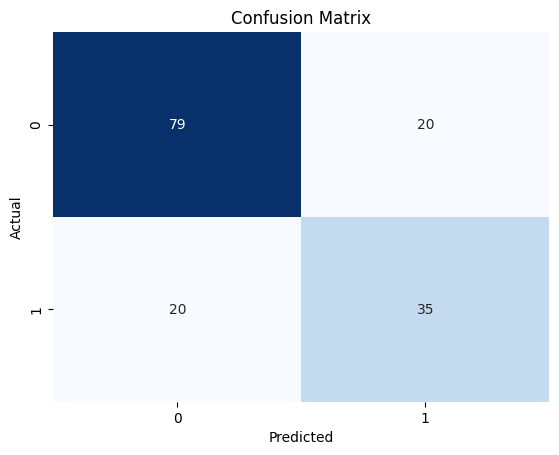

In [69]:
cm = confusion_matrix(y_test, y_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [73]:
# Get input from the user
user_input = {
    'Pregnancies': float(input('Enter number of pregnancies: ')),
    'Glucose': float(input('Enter Glucose level: ')),
    'BloodPressure': float(input('Enter Blood Pressure: ')),
    'SkinThickness': float(input('Enter Skin Thickness: ')),
    'Insulin': float(input('Enter Insulin level: ')),
    'BMI': float(input('Enter BMI: ')),
    'DiabetesPedigreeFunction': float(input('Enter Diabetes Pedigree Function: ')),
    'Age': float(input('Enter Age: '))
}

# Convert the user input into a DataFrame
user_df = pd.DataFrame([user_input])

# Make a prediction using the trained model
user_prediction = rf.predict(user_df)

# Interpret the prediction
if user_prediction[0] == 0:
    result = "No diabetes"
else:
    result = "Diabetes"

print(f"The model predicts: {result}")

Enter number of pregnancies: 10
Enter Glucose level: 120
Enter Blood Pressure: 100
Enter Skin Thickness: 4
Enter Insulin level: 20
Enter BMI: 20.1
Enter Diabetes Pedigree Function: 0
Enter Age: 40
The model predicts: No diabetes


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Build a Deep Neural Network (DNN) model
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
dnn_loss, dnn_accuracy = dnn_model.evaluate(X_test, y_test)
print(f"Deep Neural Network Model Accuracy: {dnn_accuracy:.2f}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5712 - loss: 9.6212 - val_accuracy: 0.6623 - val_loss: 2.0774
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6009 - loss: 3.7694 - val_accuracy: 0.6494 - val_loss: 1.6397
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5717 - loss: 2.7346 - val_accuracy: 0.6623 - val_loss: 1.0649
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6044 - loss: 1.8784 - val_accuracy: 0.5909 - val_loss: 0.7595
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5362 - loss: 1.5605 - val_accuracy: 0.5779 - val_loss: 0.6704
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5783 - loss: 1.1545 - val_accuracy: 0.5974 - val_loss: 0.7131
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5755 - loss: 1.0616 - val_accuracy: 0.6364 - val_loss: 0.6617
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6048 - loss: 0.8645 - val_accuracy: 0.6429 - val_loss: 0.6594
Ep

In [86]:
from sklearn.model_selection import train_test_split
X = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = df['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [91]:
from sklearn.impute import SimpleImputer

# Create the imputer
imputer = SimpleImputer(missing_values=0, strategy='mean')

# Choose only the columns you want to impute
cols_to_impute = ['SkinThickness', 'Insulin']

# Fit and transform only on those columns for X_train
X_train[cols_to_impute] = imputer.fit_transform(X_train[cols_to_impute])

# Just transform X_test
X_test[cols_to_impute] = imputer.transform(X_test[cols_to_impute])


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ds = scaler.fit_transform(X)

# Now we want to create a classifier and find the best hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()

parameters = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}


grid = GridSearchCV(model, parameters)

grid.fit(ds, y)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best parameters: {'C': 1, 'gamma': 0.1}
Best score: 0.7760971055088701


In [89]:
# Now we want to test multiple classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = [SVC(), RandomForestClassifier(), GaussianNB(), LogisticRegression(), DecisionTreeClassifier()]

parameters = {'SVM': {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10], 'gamma': [0.01, 0.1]},
              'Random Forest': {'n_estimators': [10, 100], 'max_depth': [2, 5, 10, 20, 50]},
              'Naive Bayes': {},
              'Logistic Regression': {'C': [0.1, 1, 10]},
              'Decision Tree': {'max_depth': [2, 5, 10, 20, 50, 100]}}

models = {'SVM': SVC(),
          'Random Forest': RandomForestClassifier(),
          'Naive Bayes': GaussianNB(),
          'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier()}

scores = {}

for model_name, model in models.items():
    grid = GridSearchCV(model, parameters[model_name])
    grid.fit(ds, y)
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best score for {model_name}: {grid.best_score_}")

    scores[model_name] = grid.best_score_

print(scores)
# get the best score:
print(f"The model with the best score was {max(scores, key=scores.get)} with a score of {max(scores.values())}")

Best parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Best score for SVM: 0.7773958068075715
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best score for Random Forest: 0.7748238689415159
Best parameters for Naive Bayes: {}
Best score for Naive Bayes: 0.7526355996944232
Best parameters for Logistic Regression: {'C': 1}
Best score for Logistic Regression: 0.7760886172650878
Best parameters for Decision Tree: {'max_depth': 2}
Best score for Decision Tree: 0.7357100415923945
{'SVM': np.float64(0.7773958068075715), 'Random Forest': np.float64(0.7748238689415159), 'Naive Bayes': np.float64(0.7526355996944232), 'Logistic Regression': np.float64(0.7760886172650878), 'Decision Tree': np.float64(0.7357100415923945)}
The model with the best score was SVM with a score of 0.7773958068075715


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Build a Deep Neural Network (DNN) model
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
dnn_loss, dnn_accuracy = dnn_model.evaluate(X_test, y_test)
print(f"Deep Neural Network Model Accuracy: {dnn_accuracy:.2f}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6293 - loss: 8.1876 - val_accuracy: 0.4740 - val_loss: 1.6937
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5486 - loss: 5.0403 - val_accuracy: 0.6948 - val_loss: 1.0477
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5110 - loss: 4.1290 - val_accuracy: 0.6883 - val_loss: 1.3883
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5422 - loss: 2.9881 - val_accuracy: 0.6818 - val_loss: 1.1376
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6565 - loss: 1.5831 - val_accuracy: 0.6623 - val_loss: 0.6929
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6241 - loss: 1.2502 - val_accuracy: 0.6494 - val_loss: 0.6670
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6030 - loss: 1.0785 - val_accuracy: 0.6623 - val_loss: 0.6636
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6091 - loss: 1.0352 - val_accuracy: 0.6818 - val_loss: 0.6309
Ep